# Morocco's National Power Co.

## The Problem

Analyze seasonal patterns in electricity consumption to identify peak load periods by hour and day, thereby informing strategic investments to prevent outages during these critical times.

## Data Preparation

### Imports and Reading in the CSV file

In [23]:
import pandas as pd
import seaborn as sns

In [10]:
consumption = pd.read_csv(
    '/Users/cdcoonce/Documents/GitHub/Electricity_Consumption_Analysis/data/powerconsumption.csv',
    usecols=['Datetime', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
    parse_dates=['Datetime']
    )
consumption.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964


In [15]:
# adding a 'Total_Consumption' column
consumption['Total_Consumption'] = consumption['PowerConsumption_Zone1'] + consumption['PowerConsumption_Zone2'] + consumption['PowerConsumption_Zone3']

# adding a 'Hour' column
consumption['Hour'] = consumption['Datetime'].dt.hour

# adding a 'Day_Of_Week' column
consumption['Day_Of_Week'] =  consumption['Datetime'].dt.day_of_week


consumption.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Total_Consumption,Hour,Day_Of_Week
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6


## Visualizing Consumption Over Time

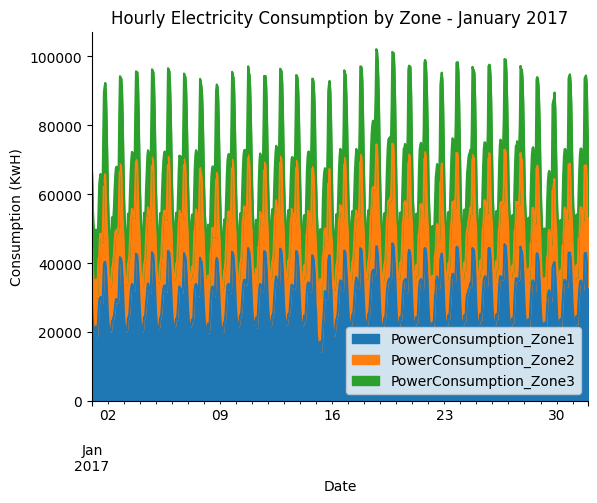

In [25]:
# Resampling rows to hourly
(consumption
    .set_index('Datetime')
    .resample('h')['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
    .mean()
    .loc['2017-01']
    .plot
    .area(
        title='Hourly Electricity Consumption by Zone - January 2017',
        xlabel='Date',
        ylabel='Consumption (KwH)'
    )
)

sns.despine()

## Visualize Consumption Seasonality

In [ ]:
# Creating a categorical datatype for 'Day_Of_Week'
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

consumption['Day_Name']= pd.Categorical(consumption['Datetime'].dt.day_name(), categories=day_of_week)

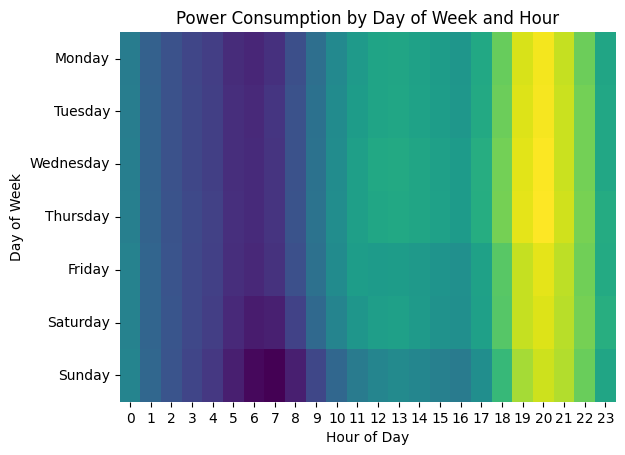

In [39]:
sns.heatmap(
    consumption.pivot_table(
        index='Day_Name',
        columns='Hour',
        values='Total_Consumption',
        aggfunc='mean',
        observed=False
    ),
    cbar=None,
    cmap='viridis'
).set(
    title='Power Consumption by Day of Week and Hour',
    xlabel= 'Hour of Day',
    ylabel='Day of Week',
);